In [29]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
url = "https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html"
response = requests.get(url)
html_Data =response.text

html_Data

'<html><body>\n<h2>Wind/WAVES type II bursts and CMEs</h2>\n<a href="waves_type2_description.htm">A Brief Description</a>\n<pre>\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.na

In [4]:
html_soup = BeautifulSoup(html_Data)
html_soup


<html><body>
<h2>Wind/WAVES type II bursts and CMEs</h2>
<a href="waves_type2_description.htm">A Brief Description</a>
<pre>
NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) 
1997/04/01 14:00 04/01 14:15  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c2rdif_waves.html">8000</a>  <a href="https://cdaw.gsfc.nasa.gov/CME_list/daily_movies/1997/04/01/c3rdif_waves.html">4000</a>   S25E16  8026 M1.3   <a href="https://cdaw.gs

In [5]:
pre_part = html_soup.find('pre').get_text()
pre_part
print(len(pre_part))

51923


In [6]:
footer  = pre_part[51825:51922]
footer

'================================================================================================='

In [7]:
header = pre_part[0:801]
header

'\nNOTE: List includes DH type II bursts observed by Wind spacecraft, \nbut after STEREO launch on Oct 2006 the start and end times and \nfrequencies of bursts are determined using both Wind and STEREO \nobservations\n\n=================================================================================================\n                DH Type II                       Flare                     CME                   \n----------------------------------------   -----------------   --------------------------   Plots\nStart            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        \n(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) \n=================================================================================================\n'

In [8]:
table =  pre_part[801:51825]
table

'1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX\n1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX\n1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX\n1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX\n1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX\n1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX\n1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX\n1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX\n1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX\n1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441   PHTX\n1997/12/12 22:45 12

In [9]:
listOfRows = table.splitlines() 
listOfRows

['1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX',
 '1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX',
 '1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX',
 '1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX',
 '1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX',
 '1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX',
 '1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX',
 '1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX',
 '1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441

In [10]:
print(len(listOfRows))
#96

string = 'Stack Overflow'
index = string.find('Over') #stores the index of a substring or char
string[:index] #returns the chars before the seen char or substring

# for Print Data
listOfRowsRight=[]
for i in listOfRows:
    listOfRowsRight.append(i[:96])
for i in listOfRowsRight:
    print(i)

518
1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX
1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  8027 C6.8   04/07 14:27 Halo  360  878   PHTX
1997/05/12 05:15 05/14 16:00 12000    80   N21W08  8038 C1.3   05/12 05:30 Halo  360  464   PHTX
1997/05/21 20:20 05/21 22:00  5000   500   N05W12  8040 M1.3   05/21 21:00  263  165  296   PHTX
1997/09/23 21:53 09/23 22:16  6000  2000   S29E25  8088 C1.4   09/23 22:02  133  155  712   PHTX
1997/11/03 05:15 11/03 12:00 14000   250   S20W13  8100 C8.6   11/03 05:28  240  109  227   PHTX
1997/11/03 10:30 11/03 11:30 14000  5000   S16W21  8100 M4.2   11/03 11:11  233  122  352   PHTX
1997/11/04 06:00 11/05 04:30 14000   100   S14W33  8100 X2.1   11/04 06:10 Halo  360  785   PHTX
1997/11/06 12:20 11/07 08:30 14000   100   S18W63  8100 X9.4   11/06 12:10 Halo  360 1556   PHTX
1997/11/27 13:30 11/27 14:00 14000  7000   N17E63  8113 X2.6   11/27 13:56   98   91  441   PHTX
1997/12/12 22:45 12/12 23:

In [11]:
data =listOfRowsRight[15].split()

data

['1998/04/24',
 '09:17',
 '04/24',
 '09:25',
 '4700',
 '2600',
 'S20E90',
 '8210',
 'C8.9',
 '04/24',
 '08:55',
 '100',
 '84',
 '1184',
 'PHTX']

In [12]:
Meta_Data=[]

for i in listOfRowsRight:
    Meta_Data.append(i.split())
    
    
'''
for i in Meta_Data:
    print(i)
    

'''

print(len(Meta_Data))       
len(Meta_Data[16])
#Meta_Data

518


15

In [13]:
#headings = ['Start_Date','Start_Time','End_Date','End_Time','Start_Frequency','End_Frequency','Flare_Location','Flare_Region','Importance','CME_Date','CME_Time','CPA','DontCare']

In [14]:
headings = ['Starting date','Starting time','Ending date','Ending time','Starting frequency','Ending frequency','Solar source location','NOAA','Imp','Date of the associated CME','Time of the associated CME','CPA','CME width in the sky plane','CME speed in the sky plane','PHTX']

In [15]:
len(headings)
Meta_Data


[['1997/04/01',
  '14:00',
  '04/01',
  '14:15',
  '8000',
  '4000',
  'S25E16',
  '8026',
  'M1.3',
  '04/01',
  '15:18',
  '74',
  '79',
  '312',
  'PHTX'],
 ['1997/04/07',
  '14:30',
  '04/07',
  '17:30',
  '11000',
  '1000',
  'S28E19',
  '8027',
  'C6.8',
  '04/07',
  '14:27',
  'Halo',
  '360',
  '878',
  'PHTX'],
 ['1997/05/12',
  '05:15',
  '05/14',
  '16:00',
  '12000',
  '80',
  'N21W08',
  '8038',
  'C1.3',
  '05/12',
  '05:30',
  'Halo',
  '360',
  '464',
  'PHTX'],
 ['1997/05/21',
  '20:20',
  '05/21',
  '22:00',
  '5000',
  '500',
  'N05W12',
  '8040',
  'M1.3',
  '05/21',
  '21:00',
  '263',
  '165',
  '296',
  'PHTX'],
 ['1997/09/23',
  '21:53',
  '09/23',
  '22:16',
  '6000',
  '2000',
  'S29E25',
  '8088',
  'C1.4',
  '09/23',
  '22:02',
  '133',
  '155',
  '712',
  'PHTX'],
 ['1997/11/03',
  '05:15',
  '11/03',
  '12:00',
  '14000',
  '250',
  'S20W13',
  '8100',
  'C8.6',
  '11/03',
  '05:28',
  '240',
  '109',
  '227',
  'PHTX'],
 ['1997/11/03',
  '10:30',
  '11/03

In [16]:
DataFrameForNASA = pd.DataFrame.from_records(Meta_Data,columns=headings ,index = None)

In [17]:
DataFrameForNASA 

,Starting date,Starting time,Ending date,Ending time,Starting frequency,Ending frequency,Solar source location,NOAA,Imp,Date of the associated CME,Time of the associated CME,CPA,CME width in the sky plane,CME speed in the sky plane,PHTX
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX


In [18]:
width = DataFrameForNASA ['CME width in the sky plane']
speed = DataFrameForNASA['CME speed in the sky plane']
DataFrameForNASA.head()
width

plots =DataFrameForNASA['PHTX']

To Make The Results As in PDF

In [19]:
headings = ['Start_Date','Start_Time','End_Date','End_Time','Start_Frequency','End_Frequency','Flare_Location','Flare_Region','Importance','CME_Date','CME_Time','CPA']

In [20]:
ResultsAsPdf = pd.DataFrame(columns=headings )

In [21]:
ResultsAsPdf['Start_Date']=DataFrameForNASA['Starting date']
ResultsAsPdf['Start_Time']=DataFrameForNASA['Starting time']
ResultsAsPdf['End_Date']=DataFrameForNASA['Ending date']
ResultsAsPdf['End_Time']=DataFrameForNASA['Ending time']
ResultsAsPdf['Start_Frequency']=DataFrameForNASA['Starting frequency']
ResultsAsPdf['End_Frequency']=DataFrameForNASA['Ending frequency']

ResultsAsPdf['Flare_Location']=DataFrameForNASA['Solar source location']
ResultsAsPdf['Flare_Region']=DataFrameForNASA['NOAA']
ResultsAsPdf['Importance']=DataFrameForNASA['Imp']
ResultsAsPdf['CME_Date']=DataFrameForNASA['Starting date']
ResultsAsPdf['CME_Time']=DataFrameForNASA['Time of the associated CME']
ResultsAsPdf['CPA']=DataFrameForNASA['CPA']








In [22]:
ResultsAsPdf

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_Date,CME_Time,CPA
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,1997/04/01,15:18,74
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,1997/04/07,14:27,Halo
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,1997/05/12,05:30,Halo
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,1997/05/21,21:00,263
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,1997/09/23,22:02,133
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,2017/09/04,20:12,Halo
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,2017/09/06,12:24,Halo
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,2017/09/10,16:00,Halo
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,2017/09/12,08:03,124


In [23]:
Halo=[]
for i in ResultsAsPdf['CPA']:
    if(i == 'Halo'):
        #print(i)
        Halo.append('True')
    else:
        #print(i)

        Halo.append('False')

    
    
    
Halo 

['False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'False',
 'True',
 'True',
 'False',
 'False',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'False',
 'False',
 'True',
 'True',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'False',
 'False',
 'False',
 'True',
 'False',
 'True',
 'True',
 'True',
 'True',
 'True',
 'False',
 'True',


In [24]:
ResultsAsPdf['Is_Helo'] = Halo
ResultsAsPdf['CPA']=ResultsAsPdf['CPA'].replace( 'Halo' , np.nan)
ResultsAsPdf['width'] =width
ResultsAsPdf['speed'] = speed
Start_DateTime = ResultsAsPdf['Start_Date'].map(str) + '-' + ResultsAsPdf['Start_Time'].map(str) 
End_DateTime = ResultsAsPdf['End_Date'].map(str) + '-' + ResultsAsPdf['End_Time'].map(str) 
CME_DateTime = ResultsAsPdf['CME_Date'].map(str) + '-' + ResultsAsPdf['CME_Time'].map(str) 

ResultsAsPdf ['Start_DateTime'] = Start_DateTime
ResultsAsPdf ['End_DateTime'] = End_DateTime 
ResultsAsPdf ['CME_DateTime'] = CME_DateTime 

ResultsAsPdf=ResultsAsPdf.drop('Start_Date', axis=1)
ResultsAsPdf=ResultsAsPdf.drop('Start_Time', axis=1)
ResultsAsPdf=ResultsAsPdf.drop('End_Date', axis=1)
ResultsAsPdf=ResultsAsPdf.drop('End_Time', axis=1)
ResultsAsPdf=ResultsAsPdf.drop('CME_Date', axis=1)
ResultsAsPdf=ResultsAsPdf.drop('CME_Time', axis=1)

ResultsAsPdf ['plots']=plots

In [25]:
ResultsAsPdf




,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CPA,Is_Helo,width,speed,Start_DateTime,End_DateTime,CME_DateTime,plots
0,8000,4000,S25E16,8026,M1.3,74,False,79,312,1997/04/01-14:00,04/01-14:15,1997/04/01-15:18,PHTX
1,11000,1000,S28E19,8027,C6.8,NaN,True,360,878,1997/04/07-14:30,04/07-17:30,1997/04/07-14:27,PHTX
2,12000,80,N21W08,8038,C1.3,NaN,True,360,464,1997/05/12-05:15,05/14-16:00,1997/05/12-05:30,PHTX
3,5000,500,N05W12,8040,M1.3,263,False,165,296,1997/05/21-20:20,05/21-22:00,1997/05/21-21:00,PHTX
4,6000,2000,S29E25,8088,C1.4,133,False,155,712,1997/09/23-21:53,09/23-22:16,1997/09/23-22:02,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,14000,210,S10W12,12673,M5.5,NaN,True,360,1418,2017/09/04-20:27,09/05-04:54,2017/09/04-20:12,PHTX
514,16000,70,S08W33,12673,X9.3,NaN,True,360,1571,2017/09/06-12:05,09/07-08:00,2017/09/06-12:24,PHTX
515,16000,150,S09W92,-----,X8.3,NaN,True,360,3163,2017/09/10-16:02,09/11-06:50,2017/09/10-16:00,PHTX
516,16000,13000,N08E48,12680,C3.0,124,False,96,252,2017/09/12-07:38,09/12-07:43,2017/09/12-08:03,PHTX


In [26]:
ResultsAsPdf = ResultsAsPdf[['Start_DateTime','End_DateTime','Start_Frequency','End_Frequency','Flare_Location','Flare_Region' , 'Importance','CME_DateTime','CPA','width','speed' ,'plots','Is_Helo']]


In [27]:
ResultsAsPdf

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,width,speed,plots,Is_Helo
0,1997/04/01-14:00,04/01-14:15,8000,4000,S25E16,8026,M1.3,1997/04/01-15:18,74,79,312,PHTX,False
1,1997/04/07-14:30,04/07-17:30,11000,1000,S28E19,8027,C6.8,1997/04/07-14:27,NaN,360,878,PHTX,True
2,1997/05/12-05:15,05/14-16:00,12000,80,N21W08,8038,C1.3,1997/05/12-05:30,NaN,360,464,PHTX,True
3,1997/05/21-20:20,05/21-22:00,5000,500,N05W12,8040,M1.3,1997/05/21-21:00,263,165,296,PHTX,False
4,1997/09/23-21:53,09/23-22:16,6000,2000,S29E25,8088,C1.4,1997/09/23-22:02,133,155,712,PHTX,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04-20:27,09/05-04:54,14000,210,S10W12,12673,M5.5,2017/09/04-20:12,NaN,360,1418,PHTX,True
514,2017/09/06-12:05,09/07-08:00,16000,70,S08W33,12673,X9.3,2017/09/06-12:24,NaN,360,1571,PHTX,True
515,2017/09/10-16:02,09/11-06:50,16000,150,S09W92,-----,X8.3,2017/09/10-16:00,NaN,360,3163,PHTX,True
516,2017/09/12-07:38,09/12-07:43,16000,13000,N08E48,12680,C3.0,2017/09/12-08:03,124,96,252,PHTX,False


In [63]:
ResultsAsPdf[:50]

,Start_DateTime,End_DateTime,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Importance,CME_DateTime,CPA,width,speed,plots,Is_Helo
0,1997/04/01-14:00,04/01-14:15,8000,4000,S25E16,8026,M1.3,1997/04/01-15:18,74,79,312,PHTX,False
1,1997/04/07-14:30,04/07-17:30,11000,1000,S28E19,8027,C6.8,1997/04/07-14:27,NaN,360,878,PHTX,True
2,1997/05/12-05:15,05/14-16:00,12000,80,N21W08,8038,C1.3,1997/05/12-05:30,NaN,360,464,PHTX,True
3,1997/05/21-20:20,05/21-22:00,5000,500,N05W12,8040,M1.3,1997/05/21-21:00,263,165,296,PHTX,False
4,1997/09/23-21:53,09/23-22:16,6000,2000,S29E25,8088,C1.4,1997/09/23-22:02,133,155,712,PHTX,False
5,1997/11/03-05:15,11/03-12:00,14000,250,S20W13,8100,C8.6,1997/11/03-05:28,240,109,227,PHTX,False
6,1997/11/03-10:30,11/03-11:30,14000,5000,S16W21,8100,M4.2,1997/11/03-11:11,233,122,352,PHTX,False
7,1997/11/04-06:00,11/05-04:30,14000,100,S14W33,8100,X2.1,1997/11/04-06:10,NaN,360,785,PHTX,True
8,1997/11/06-12:20,11/07-08:30,14000,100,S18W63,8100,X9.4,1997/11/06-12:10,NaN,360,1556,PHTX,True
9,1997/11/27-13:30,11/27-14:00,14000,7000,N17E63,8113,X2.6,1997/11/27-13:56,98,91,441,PHTX,False


Question 1: Replication 

there are no similarity between Nasa DataSet and spaceweatherlive 
expected Region in spaceweatherlive and Flare_Region in Nasa i think it is replicate  


Question 2: Integration

 best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data
 is Region or Flare_Region 

Question 3: Analysis 
 

In [77]:

ResultsAsPdf['Start_Frequency']=ResultsAsPdf['Start_Frequency'].replace( '????' ,1000)
ResultsAsPdf['End_Frequency']=ResultsAsPdf['End_Frequency'].replace( '????' ,1000)

ResultsAsPdf['Start_Frequency'] = ResultsAsPdf['Start_Frequency'].astype(int)
ResultsAsPdf['End_Frequency'] = ResultsAsPdf['End_Frequency'].astype(int)





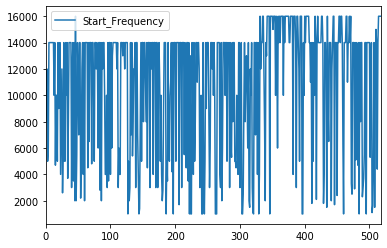

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

ResultsAsPdf.plot(kind='line',y='Start_Frequency',ax=ax)
#ResultsAsPdf.plot(kind='line',x='plots',y='End_Frequency', color='red', ax=ax)

plt.show()

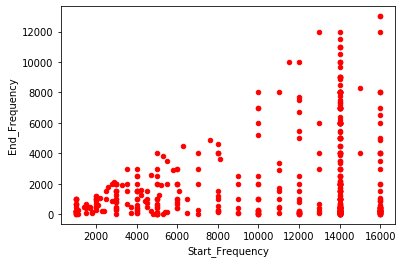

In [56]:
ResultsAsPdf.plot(kind='scatter',x='Start_Frequency',y='End_Frequency',color='red')
plt.show()